In [1]:
import tensorflow as tf
import cv2
import numpy as np
from keras.datasets import mnist
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D  

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

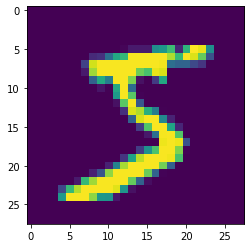

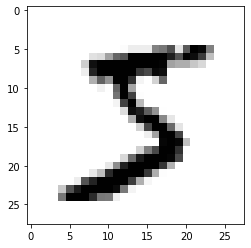

In [3]:
plt.imshow(X_train[0])
plt.show()
plt.imshow(X_train[0], cmap=plt.cm.binary)

In [4]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

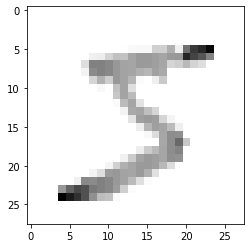

In [5]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)
plt.imshow(X_train[0], cmap=plt.cm.binary)

In [6]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
y_train[0]

5

In [8]:
x_train = np.array(X_train).reshape(-1,28,28,1)
x_test = np.array(X_test).reshape(-1,28,28,1)
print('shape_train-->',x_train.shape)
print('shape_test-->',x_test.shape)

shape_train--> (60000, 28, 28, 1)
shape_test--> (10000, 28, 28, 1)


In [9]:
model = Sequential()

### First Convalution Layer
model.add(Conv2D(64,(3,3), input_shape = x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

### Second Convalution Layer
model.add(Conv2D(64,(3,3), input_shape = x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

### 3rd Convalution Layer
model.add(Conv2D(64,(3,3), input_shape = x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

### FUlly connected Layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

### FUlly connected Layer - 2nd
model.add(Dense(32))
model.add(Activation('relu'))

### Last fully connected Layer
model.add(Dense(10))
model.add(Activation('softmax'))



In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.fit(x_train,y_train,epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 47s 35ms/step - loss: 0.7114 - accuracy: 0.7664 - val_loss: 0.1445 - val_accuracy: 0.9549
Epoch 2/10
1313/1313 [==============================] - 44s 34ms/step - loss: 0.1256 - accuracy: 0.9614 - val_loss: 0.0947 - val_accuracy: 0.9710
Epoch 3/10
1313/1313 [==============================] - 39s 30ms/step - loss: 0.0809 - accuracy: 0.9759 - val_loss: 0.0863 - val_accuracy: 0.9729
Epoch 4/10
1313/1313 [==============================] - 36s 28ms/step - loss: 0.0595 - accuracy: 0.9808 - val_loss: 0.0676 - val_accuracy: 0.9804
Epoch 5/10
1313/1313 [==============================] - 36s 28ms/step - loss: 0.0494 - accuracy: 0.9839 - val_loss: 0.0799 - val_accuracy: 0.9759
Epoch 6/10
1313/1313 [==============================] - 36s 28ms/step - loss: 0.0410 - accuracy: 0.9875 - val_loss: 0.0589 - val_accuracy: 0.9819
Epoch 7/10
1313/1313 [==============================] - 37s 28ms/step - loss: 0.0328 - accuracy: 0.9888 - val_loss: 0.0654 -

In [13]:
test_loss, test_acc = model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0744 - accuracy: 0.9803


In [14]:
predictions = model.predict([x_test])
print(predictions)

[[1.1667928e-15 7.0934409e-09 4.6539994e-12 ... 1.0000000e+00
  3.8434199e-16 4.4628808e-11]
 [3.5397159e-05 5.3862818e-06 9.9994040e-01 ... 7.1357799e-06
  3.7014502e-06 5.7350098e-07]
 [7.1723978e-09 9.9999928e-01 5.7610105e-08 ... 3.6813427e-07
  5.6745620e-08 3.0423315e-08]
 ...
 [9.4528357e-11 6.1684986e-08 6.2923988e-10 ... 1.4479491e-06
  2.1383805e-07 4.2845504e-06]
 [5.4298591e-05 3.6680378e-06 5.2235793e-10 ... 1.9554221e-07
  3.2670207e-05 2.6663145e-07]
 [1.1866501e-05 1.3665926e-06 5.1488541e-07 ... 3.7720400e-09
  9.1232465e-08 1.8036100e-06]]


4


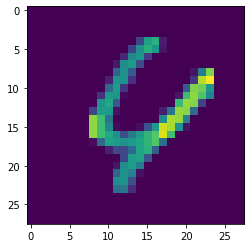

In [15]:
print(np.argmax(predictions[121]))
plt.imshow(x_test[121])

In [ ]:
for i in np.random.choice(np.arange(0, len(y_test)), size = (10,)):

    probs = model.predict(x_test[np.newaxis, i])
    prediction = probs.argmax(axis=1)
 
    image = (X_test[i] * 255).reshape((28, 28)).astype("uint8")
 
    print("Actual digit is {0}, predicted {1}".format(y_test[i], prediction[0]))
    cv2.imshow("Digit", image)
    cv2.waitKey(0) 

Actual digit is 1, predicted 1
